# **Holosun Product Returns Analysis**
### **Objective**
The objective of this analysis is to identify high-return Holosun products and understand the underlying reasons for these returns. This project not only aims to analyze return trends but also emphasizes the importance of consumer education to reduce return rates. By leveraging sales and return data from Amazon, complemented with advanced visualizations, this analysis seeks to highlight opportunities for improving product listings and addressing recurring customer issues. Furthermore, the findings advocate for the integration of visual aids like infographics to better educate customers on product compatibility and installation, ensuring informed purchasing decisions.

### **Workflow**
1. Import libraries and prepare the dataset.
2. Perform exploratory data analysis (EDA) to clean the data.
3. Focus on specific ASINs to analyze return trends and customer comments.
4. Generate visualizations to support findings.
5. Conclude with actionable insights based on the analysis.


In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz  # Required for timezone information
import seaborn as sns

# Setting up visual styles
plt.style.use('seaborn')


This code cell below performs an initial exploration of two datasets: one containing return data and the other containing customer comments. The overview reveals that the return dataset has 608 entries and the customer comments dataset has 609 entries, with no missing values in most columns except for the "customer-comments" column, which has 190 and 191 missing values respectively. Both datasets were found to have no duplicate rows, ensuring data integrity for subsequent analysis. The results highlight that while the core return and product information is complete, a significant portion of customer feedback is missing, which could impact the depth of insights derived from customer comments.

In [2]:
# Load the data files
returns_file_path = '1370979020067.csv'  # Replace with your actual file path
comments_file_path = 'customer comments.csv'  # Replace with your actual file path

# Load datasets
returns_df = pd.read_csv(returns_file_path)
comments_df = pd.read_csv(comments_file_path)

# Quick overview of the datasets
print("Returns Data Overview:")
print(returns_df.info())
print("\nMissing Values in Returns Data:")
print(returns_df.isnull().sum())

print("\nCustomer Comments Data Overview:")
print(comments_df.info())
print("\nMissing Values in Customer Comments Data:")
print(comments_df.isnull().sum())

# Check for duplicates in both datasets
print("\nDuplicates in Returns Data:", returns_df.duplicated().sum())
print("Duplicates in Customer Comments Data:", comments_df.duplicated().sum())


Returns Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   return-date            608 non-null    object
 1   order-id               608 non-null    object
 2   sku                    608 non-null    object
 3   asin                   608 non-null    object
 4   fnsku                  608 non-null    object
 5   product-name           608 non-null    object
 6   quantity               608 non-null    int64 
 7   fulfillment-center-id  608 non-null    object
 8   detailed-disposition   608 non-null    object
 9   reason                 608 non-null    object
 10  status                 608 non-null    object
 11  license-plate-number   608 non-null    object
 12  customer-comments      418 non-null    object
dtypes: int64(1), object(12)
memory usage: 61.9+ KB
None

Missing Values in Returns Data:
return-date      

This code cell filters the dataset to include only rows where the product name contains the keyword "HOLOSUN," ensuring the focus remains on the relevant product line. The filtered data is then grouped by ASIN and product name to count the total number of returns for each product. After sorting the results in descending order by return count, the top 5 products with the most returns are displayed in a neatly formatted table with sequential indexing. The output highlights the "SCS-MOS-GR" as the product with the highest returns (25), followed by "HS407K" (14) and "HS407C" (13). This analysis provides clear insights into the most frequently returned Holosun products, offering valuable information for addressing return-related issues.

In [12]:
# Filter the data to include only rows where the product name contains 'HOLOSUN'
holosun_returns = returns_df[returns_df['product-name'].str.contains('HOLOSUN', case=False, na=False)]

# Group by ASIN and product name, and count the number of returns
holosun_asin_return_counts = holosun_returns.groupby(['asin', 'product-name']).size().reset_index(name='return_count')

# Sort by return count in descending order and select the top 5
top_5_holosun_asins = holosun_asin_return_counts.sort_values(by='return_count', ascending=False).head(5).reset_index(drop=True)

# Display the top 5 ASINs with most returns for Holosun products
from IPython.display import display
display(top_5_holosun_asins)




,asin,product-name,return_count
0,SCS-MOS-GR,HOLOSUN SCS MOS Green Multi-Reticle 2 MOA Dot ...,25
1,HS407K,HOLOSUN HS407K-X2 Compact 6MOA Dot Only Open R...,14
2,HS407C,HOLOSUN HS407C X2 Red 2 MOA Dot Open Reflex Si...,13
3,B0B96LVCV8,HOLOSUN EPS 6 MOA Green Dot Reflex Pistol Sigh...,10
4,B0B9FLWNKM,HOLOSUN EPS Carry Red MRS 2 MOA Dot & 32 MOA C...,9


Number of returns for HS407K in the last 30 days: 13


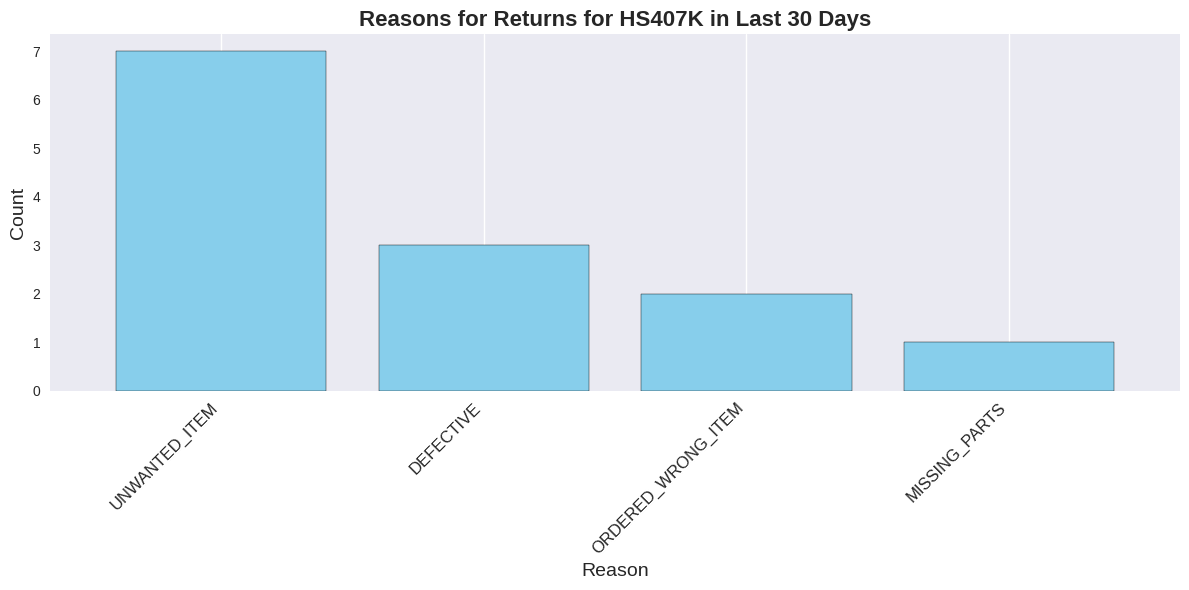

,customer-comments
0,"Replacing with a different optic. Mounted to device, but not used beyond that."
1,The sight will not fit my device.
2,Too complicated.
3,Purchased wrong holosun red dot sight. Size is not correct.
4,Not suitable for me
5,I should have bought the 507K
6,"Missing screws There should be 2 packs of screws, different sizes I got 1 pack of screws cut open with 2 different sizes in it Also when it was delivered it was thrown down on the concrete side walk. I was 30 feet away and heard it hit the concrete Some of your drivers have no respect on products they deliver This is a red dot sight... very sensitive and not to be thrown on a hard surface"
7,I am unsatisfied with the fit.
8,Does not fit on what I purchased it for
9,did not fit my need


Number of returns for HS407C in the last 30 days: 13


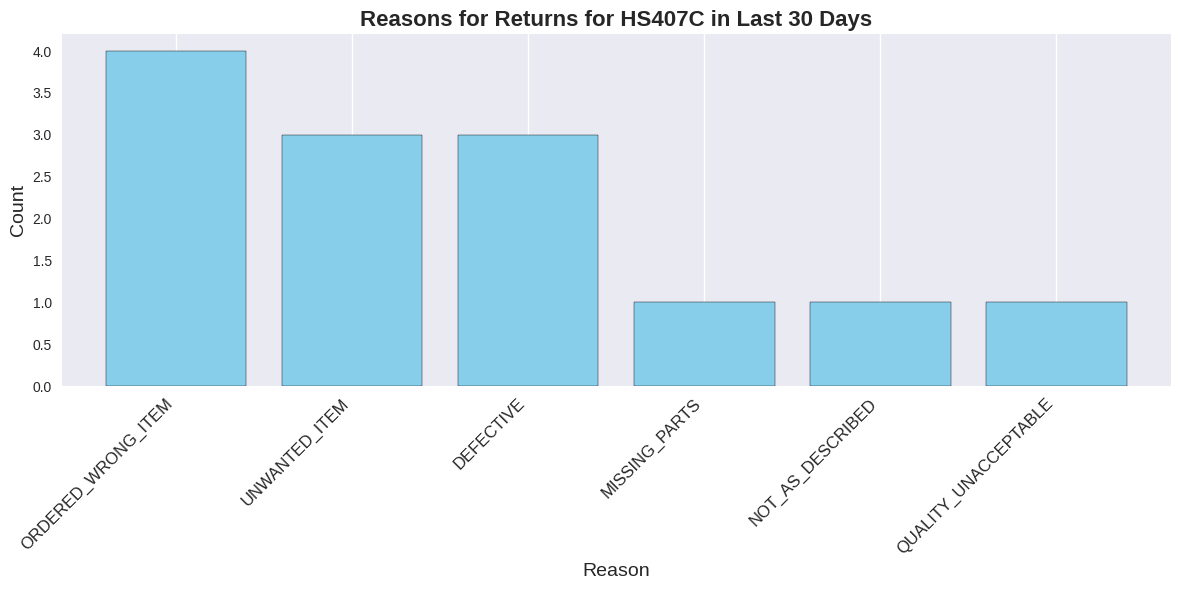

,customer-comments
0,The bought the wrong model didn't fit
1,Wrong size
2,Wrong size
3,To small for my gun
4,"This item isn't needed, need different size one for different item"
5,Wrong size
6,Not suitable for pistol
7,Ordered by mistake. My shopping cart was not cleared. I bought two not one each by mistake.


Number of returns for SCS-MOS-GR in the last 30 days: 25


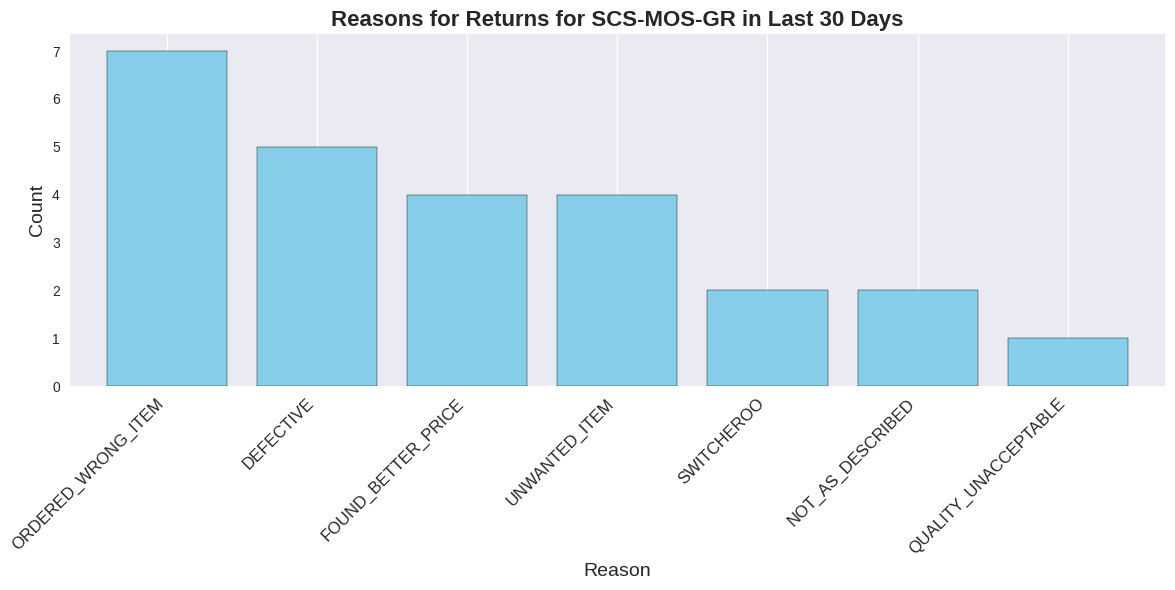

,customer-comments
0,I bought the wrong optic my pistol has a zev rmr cut not a mos cut
1,"After range session, will not hold zero. Also, function button is really hard to use to turn on and off."
2,"I installed the optic, it won't hold zero at all. I have to keep adjusting the knobs and then the dot moves after I turn it on and off. It also has like a starburst pattern on the dot and makes it hard to see."
3,I didn't realize what MOS meant. I have the gen 4 and realized there is no way to attach. I'm going to have it milled and get the 507k holosun
4,Don't need
5,doesnt fit
6,Length of screws do not fit the vp9 match through the mount. Wrong length size
7,It was not compatible with the optics footprint on my slide.
8,not compatible with current slot G17
9,One of two vital adjustments failed to adjust. Up down adjustment would not raise or lower dot.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz  # Required to add timezone information

# Function to analyze returns and comments for a specific ASIN
def analyze_holosun(df, comments_df, asin, product_name):
    # Replace ASIN with its better name
    df['asin'] = df['asin'].replace(asin, product_name)
    comments_df['asin'] = comments_df['asin'].replace(asin, product_name)
    
    # Filter for the last 30 days
    current_date = datetime.now(pytz.FixedOffset(-480))  # UTC-8
    thirty_days_ago = current_date - timedelta(days=30)
    df['return-date'] = pd.to_datetime(df['return-date'])
    last_30_days_df = df[df['return-date'] >= thirty_days_ago]
    updated_asin_df = last_30_days_df[last_30_days_df['asin'] == product_name]

    # Returns Bar Graph
    if not updated_asin_df.empty:
        return_count = len(updated_asin_df)
        print(f"Number of returns for {product_name} in the last 30 days: {return_count}")
        
        # Bar graph for reasons
        plt.figure(figsize=(12, 6))
        updated_asin_df['reason'].value_counts().plot(
            kind='bar', 
            color='skyblue', 
            edgecolor='black', 
            width=0.8
        )
        plt.title(f'Reasons for Returns for {product_name} in Last 30 Days', fontsize=16, fontweight='bold')
        plt.xlabel('Reason', fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45, fontsize=12, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No records found for {product_name} in the last 30 days.")

    # Comments Table
    comments_filtered_df = comments_df[comments_df['asin'] == product_name].copy()
    comments_filtered_df['customer-comments'] = comments_filtered_df['customer-comments'].str.replace('�', "'", regex=False)
    if not comments_filtered_df.empty:
        styled_table = comments_filtered_df[['customer-comments']].dropna().reset_index(drop=True).style.set_caption(
            f"Customer Comments for ASIN: {asin} ({product_name})"
        ).set_table_styles(
            [
                {'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '18px'), ('font-weight', 'bold'), ('text-align', 'center')]},
                {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-size', '14px'), ('font-weight', 'bold'), ('text-align', 'center')]},
                {'selector': 'tbody td', 'props': [('font-size', '12px'), ('text-align', 'left')]},
            ]
        ).apply(
            lambda x: ['background-color: #f9f9f9' if i % 2 == 0 else 'background-color: #ffffff' for i in range(len(x))],
            axis=0
        ).set_properties(
            **{'border': '1px solid black', 'padding': '6px'}
        )
        display(styled_table)
    else:
        print(f"No comments found for ASIN: {asin} ({product_name})")

# Load the data files
returns_file_path = '1370979020067.csv'  # Update with actual file path
comments_file_path = 'customer comments.csv'  # Update with actual file path
returns_df = pd.read_csv(returns_file_path)
comments_df = pd.read_csv(comments_file_path)

# Analyze for the given ASINs
analyze_holosun(returns_df, comments_df, 'B08G6FBB86', 'HS407K')
analyze_holosun(returns_df, comments_df, 'B08G6NR7RR', 'HS407C')
analyze_holosun(returns_df, comments_df, 'B09YVQMJCY', 'SCS-MOS-GR')


# **Conclusion**

This analysis of return data and customer comments for Holosun products over the last 30 days not only identifies return trends but also reinforces the importance of addressing consumer education as a preventative measure. The results emphasize the need for clear and engaging product information, potentially through the use of infographics on the Amazon platform, rather than relying solely on plain text descriptions.

## **Top Returned Products**
- **HS407K**: Recorded 13 returns with the most common reason being "Unwanted Item," followed by "Defective" and "Ordered Wrong Item."
- **HS407C**: Also had 13 returns, predominantly due to "Ordered Wrong Item" and "Unwanted Item."
- **SCS-MOS-GR**: Registered the highest number of returns at 25, with "Ordered Wrong Item" being the leading cause, followed by "Defective" and "Found Better Price."

## **Insights on Return Reasons**
- Across all products, "Ordered Wrong Item" and "Unwanted Item" were recurring issues, primarily linked to compatibility misunderstandings. This highlights a key opportunity to improve how product dimensions and compatibility are communicated.
- Many customers expressed frustrations related to fitment issues, stemming from buying optics without confirming the correct dimensions or mount compatibility.

## **Recommendations**
1. **Enhance Product Listings with Infographics**: Replace or supplement plain text descriptions with intuitive infographics detailing product dimensions, mounting specifications, and firearm compatibility. This approach can address fitment issues and reduce confusion.
2. **Educate Consumers**: Use visuals and videos on product pages to educate buyers about proper selection and installation. Providing a visual guide can preempt returns caused by misunderstandings.
3. **Quality Assurance**: Address frequent defects reported by customers, such as missing screws or performance issues (e.g., alignment, zero retention).
4. **Competitive Pricing Strategy**: Monitor competitor pricing while emphasizing value-added features to maintain a competitive edge.
5. **Detailed FAQs**: Include comprehensive FAQs addressing common concerns such as compatibility and installation processes.




